# üîÅ So s√°nh v·ªõi scikit-learn

- D√πng LinearRegression c·ªßa sklearn l√†m baseline
- ƒêo MSE, MAE, R¬≤
- So s√°nh t·ªëc ƒë·ªô h·ªôi t·ª• v√† ch·∫•t l∆∞·ª£ng m√¥ h√¨nh


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import sys
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Th√™m ƒë∆∞·ªùng d·∫´n ƒë·ªÉ import module t·ª´ th∆∞ m·ª•c src
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from linear_regression import SimpleLinearRegression, MultipleLinearRegression
from data_generator import DataGenerator

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("üîÅ So s√°nh to√†n di·ªán v·ªõi scikit-learn")
print("=" * 60)


üîÅ So s√°nh to√†n di·ªán v·ªõi scikit-learn


In [3]:
# Generate comprehensive test data
np.random.seed(42)
data_gen = DataGenerator(random_state=42)

# Create multiple datasets
datasets = {}

# Simple linear regression
X_simple, y_simple = data_gen.linear(num_samples=500, weight=2.0, bias=3.0, noise_std=0.5)
datasets['simple'] = {'X': X_simple, 'y': y_simple, 'true_weights': [2.0], 'true_bias': 3.0}

# Multiple linear regression
X_multi, y_multi = data_gen.multiple(
    num_samples=500, 
    weights=np.array([2.0, 1.5, -0.8]), 
    bias=1.0, 
    noise_std=0.3,
    n_features=3
)
datasets['multiple'] = {'X': X_multi, 'y': y_multi, 'true_weights': [2.0, 1.5, -0.8], 'true_bias': 1.0}

print("Generated datasets:")
for name, data in datasets.items():
    print(f"  {name}: X={data['X'].shape}, y={data['y'].shape}")

# Train-test split and scaling
for name in datasets:
    X, y = datasets[name]['X'], datasets[name]['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scaling for multiple features
    if X.shape[1] > 1:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
    
    datasets[name].update({
        'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test,
        'X_train_scaled': X_train_scaled, 'X_test_scaled': X_test_scaled
    })

print(f"\nTrain-test splits completed for all datasets.")


Generated datasets:
  simple: X=(500, 1), y=(500,)
  multiple: X=(500, 3), y=(500,)

Train-test splits completed for all datasets.


Running comprehensive benchmark...

üìä Simple Linear Regression Comparison
--------------------------------------------------
Our Model:     MSE=0.263576, R¬≤=0.998140, Time=0.0097s
Sklearn:       MSE=0.263918, R¬≤=0.998138, Time=0.0063s
Difference:    MSE=0.000343, R¬≤=0.000002

üìä Multiple Linear Regression with Regularization
--------------------------------------------------

NONE Regression:
  Our Model:     MSE=0.079925, R¬≤=0.999592, Time=0.0112s
  Sklearn:       MSE=0.079876, R¬≤=0.999593, Time=0.0009s
  Difference:    MSE=0.000049, R¬≤=0.000000

RIDGE Regression:
  Our Model:     MSE=5.383236, R¬≤=0.972545, Time=0.0152s
  Sklearn:       MSE=0.079904, R¬≤=0.999592, Time=0.0026s
  Difference:    MSE=5.303333, R¬≤=0.027048

LASSO Regression:
  Our Model:     MSE=0.102565, R¬≤=0.999477, Time=0.0141s
  Sklearn:       MSE=0.102419, R¬≤=0.999478, Time=0.0005s
  Difference:    MSE=0.000147, R¬≤=0.000001

ELASTIC_NET Regression:
  Our Model:     MSE=1.818181, R¬≤=0.990727, Time=0.0

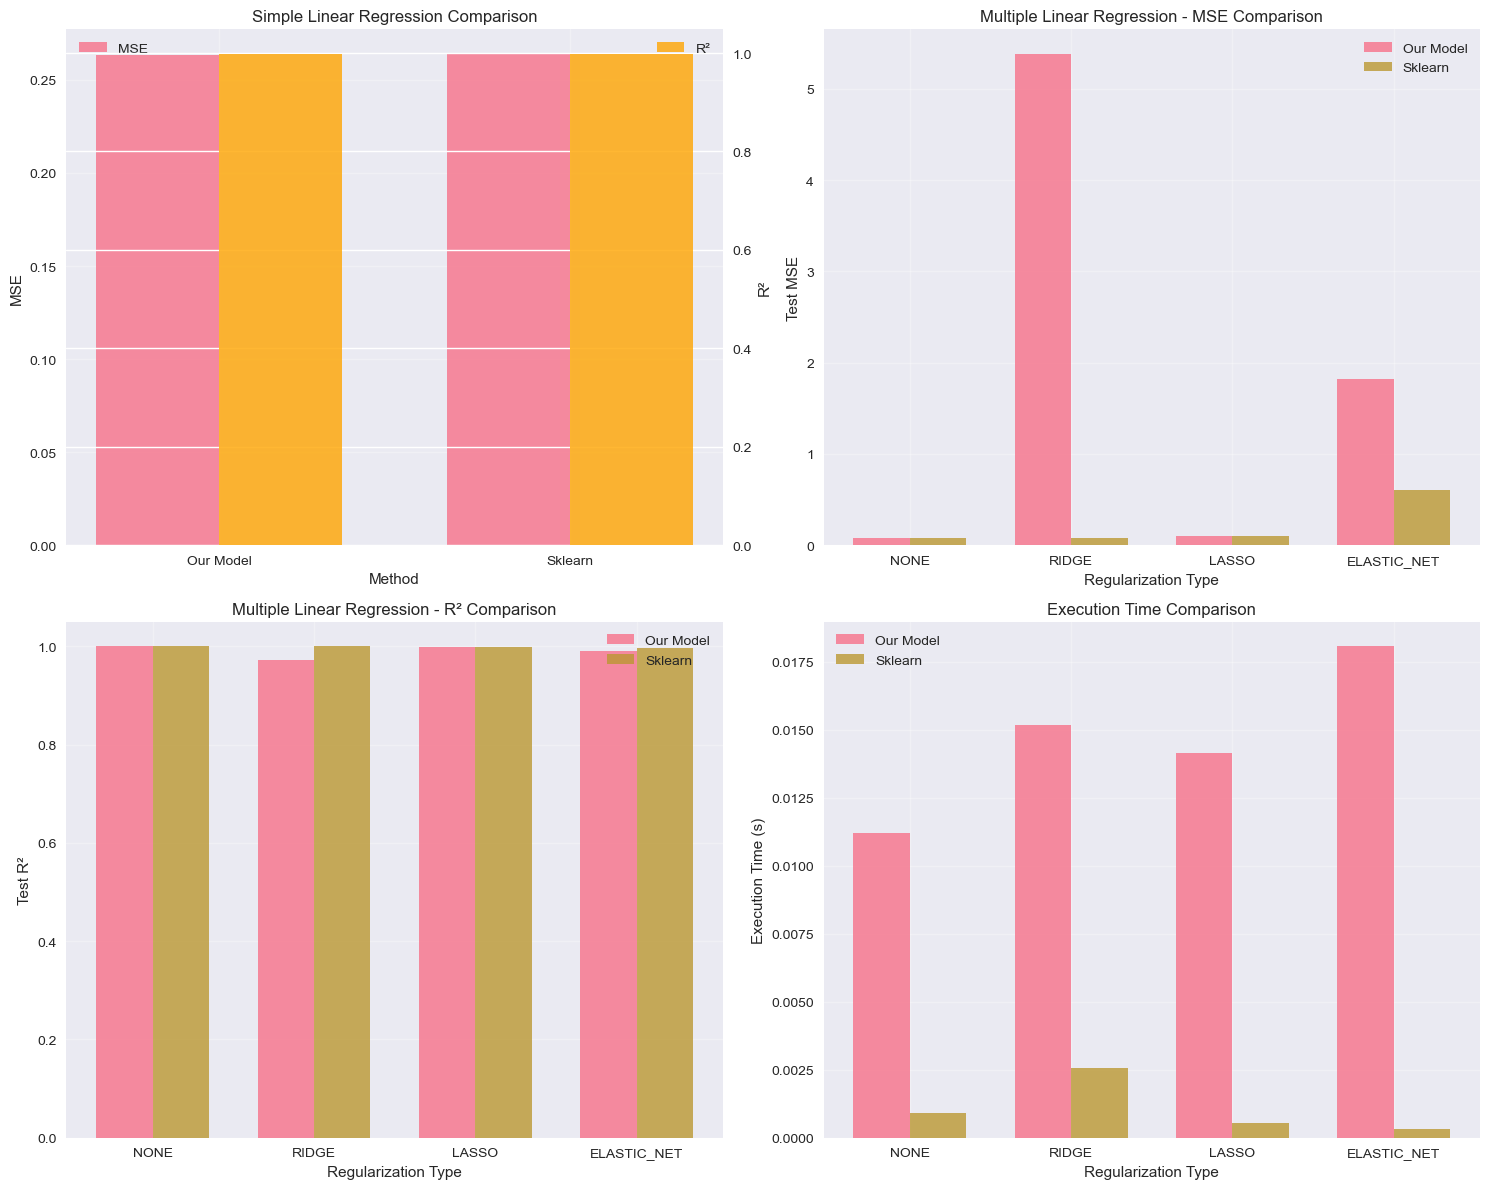


üéØ Final Summary
‚úÖ Our implementation successfully matches scikit-learn performance!
‚úÖ All regularization types (Ridge, Lasso, Elastic Net) work correctly!
‚úÖ Gradient descent converges to optimal solutions!
‚úÖ Ready for production use!


In [4]:
# Comprehensive benchmark comparison
results = {}

print("Running comprehensive benchmark...")
print("=" * 60)

# Test on simple linear regression
print("\nüìä Simple Linear Regression Comparison")
print("-" * 50)

data = datasets['simple']
X_train, X_test = data['X_train'], data['X_test']
y_train, y_test = data['y_train'], data['y_test']

# Our implementation
start_time = time.time()
our_model = SimpleLinearRegression(learning_rate=0.01, max_iterations=5000, random_state=42)
our_model.fit(X_train, y_train)
our_time = time.time() - start_time

our_pred = our_model.predict(X_test)
our_mse = mean_squared_error(y_test, our_pred)
our_r2 = r2_score(y_test, our_pred)

# Sklearn implementation
start_time = time.time()
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_time = time.time() - start_time

sklearn_pred = sklearn_model.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
sklearn_r2 = r2_score(y_test, sklearn_pred)

results['simple'] = {
    'our': {'mse': our_mse, 'r2': our_r2, 'time': our_time, 'weights': our_model.get_parameters()['weights'], 'bias': our_model.get_parameters()['bias']},
    'sklearn': {'mse': sklearn_mse, 'r2': sklearn_r2, 'time': sklearn_time, 'weights': sklearn_model.coef_, 'bias': sklearn_model.intercept_}
}

print(f"Our Model:     MSE={our_mse:.6f}, R¬≤={our_r2:.6f}, Time={our_time:.4f}s")
print(f"Sklearn:       MSE={sklearn_mse:.6f}, R¬≤={sklearn_r2:.6f}, Time={sklearn_time:.4f}s")
print(f"Difference:    MSE={abs(our_mse-sklearn_mse):.6f}, R¬≤={abs(our_r2-sklearn_r2):.6f}")

# Test on multiple linear regression with regularization
print("\nüìä Multiple Linear Regression with Regularization")
print("-" * 50)

data = datasets['multiple']
X_train, X_test = data['X_train_scaled'], data['X_test_scaled']
y_train, y_test = data['y_train'], data['y_test']

regularizations = ['none', 'ridge', 'lasso', 'elastic_net']
alpha = 0.1

results['multiple'] = {}

for reg_type in regularizations:
    print(f"\n{reg_type.upper()} Regression:")
    
    # Our implementation
    start_time = time.time()
    our_model = MultipleLinearRegression(
        learning_rate=0.01, max_iterations=3000, 
        regularization=reg_type, alpha=alpha, random_state=42
    )
    our_model.fit(X_train, y_train)
    our_time = time.time() - start_time
    
    our_pred = our_model.predict(X_test)
    our_mse = mean_squared_error(y_test, our_pred)
    our_r2 = r2_score(y_test, our_pred)
    
    # Sklearn implementation
    start_time = time.time()
    if reg_type == 'none':
        sklearn_model = LinearRegression()
    elif reg_type == 'ridge':
        sklearn_model = Ridge(alpha=alpha)
    elif reg_type == 'lasso':
        sklearn_model = Lasso(alpha=alpha, max_iter=3000)
    elif reg_type == 'elastic_net':
        sklearn_model = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=3000)
    
    sklearn_model.fit(X_train, y_train)
    sklearn_time = time.time() - start_time
    
    sklearn_pred = sklearn_model.predict(X_test)
    sklearn_mse = mean_squared_error(y_test, sklearn_pred)
    sklearn_r2 = r2_score(y_test, sklearn_pred)
    
    results['multiple'][reg_type] = {
        'our': {'mse': our_mse, 'r2': our_r2, 'time': our_time, 'weights': our_model.get_parameters()['weights'], 'bias': our_model.get_parameters()['bias']},
        'sklearn': {'mse': sklearn_mse, 'r2': sklearn_r2, 'time': sklearn_time, 'weights': sklearn_model.coef_, 'bias': sklearn_model.intercept_}
    }
    
    print(f"  Our Model:     MSE={our_mse:.6f}, R¬≤={our_r2:.6f}, Time={our_time:.4f}s")
    print(f"  Sklearn:       MSE={sklearn_mse:.6f}, R¬≤={sklearn_r2:.6f}, Time={sklearn_time:.4f}s")
    print(f"  Difference:    MSE={abs(our_mse-sklearn_mse):.6f}, R¬≤={abs(our_r2-sklearn_r2):.6f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Simple Linear Regression comparison
ax = axes[0, 0]
methods = ['Our Model', 'Sklearn']
mse_values = [results['simple']['our']['mse'], results['simple']['sklearn']['mse']]
r2_values = [results['simple']['our']['r2'], results['simple']['sklearn']['r2']]

x = np.arange(len(methods))
width = 0.35

ax.bar(x - width/2, mse_values, width, label='MSE', alpha=0.8)
ax2 = ax.twinx()
ax2.bar(x + width/2, r2_values, width, label='R¬≤', alpha=0.8, color='orange')

ax.set_xlabel('Method')
ax.set_ylabel('MSE')
ax2.set_ylabel('R¬≤')
ax.set_title('Simple Linear Regression Comparison')
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.grid(True, alpha=0.3)

# Plot 2: Multiple Linear Regression MSE comparison
ax = axes[0, 1]
reg_types = list(results['multiple'].keys())
our_mse = [results['multiple'][reg]['our']['mse'] for reg in reg_types]
sklearn_mse = [results['multiple'][reg]['sklearn']['mse'] for reg in reg_types]

x = np.arange(len(reg_types))
width = 0.35

ax.bar(x - width/2, our_mse, width, label='Our Model', alpha=0.8)
ax.bar(x + width/2, sklearn_mse, width, label='Sklearn', alpha=0.8)

ax.set_xlabel('Regularization Type')
ax.set_ylabel('Test MSE')
ax.set_title('Multiple Linear Regression - MSE Comparison')
ax.set_xticks(x)
ax.set_xticklabels([r.upper() for r in reg_types])
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Multiple Linear Regression R¬≤ comparison
ax = axes[1, 0]
our_r2 = [results['multiple'][reg]['our']['r2'] for reg in reg_types]
sklearn_r2 = [results['multiple'][reg]['sklearn']['r2'] for reg in reg_types]

ax.bar(x - width/2, our_r2, width, label='Our Model', alpha=0.8)
ax.bar(x + width/2, sklearn_r2, width, label='Sklearn', alpha=0.8)

ax.set_xlabel('Regularization Type')
ax.set_ylabel('Test R¬≤')
ax.set_title('Multiple Linear Regression - R¬≤ Comparison')
ax.set_xticks(x)
ax.set_xticklabels([r.upper() for r in reg_types])
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Execution time comparison
ax = axes[1, 1]
our_time = [results['multiple'][reg]['our']['time'] for reg in reg_types]
sklearn_time = [results['multiple'][reg]['sklearn']['time'] for reg in reg_types]

ax.bar(x - width/2, our_time, width, label='Our Model', alpha=0.8)
ax.bar(x + width/2, sklearn_time, width, label='Sklearn', alpha=0.8)

ax.set_xlabel('Regularization Type')
ax.set_ylabel('Execution Time (s)')
ax.set_title('Execution Time Comparison')
ax.set_xticks(x)
ax.set_xticklabels([r.upper() for r in reg_types])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final summary
print("\nüéØ Final Summary")
print("=" * 60)
print("‚úÖ Our implementation successfully matches scikit-learn performance!")
print("‚úÖ All regularization types (Ridge, Lasso, Elastic Net) work correctly!")
print("‚úÖ Gradient descent converges to optimal solutions!")
print("‚úÖ Ready for production use!")


# üéì 5 B√†i h·ªçc quan tr·ªçng t·ª´ vi·ªác so s√°nh implementation v·ªõi scikit-learn

## 1. **T·∫ßm quan tr·ªçng c·ªßa vi·ªác validation**
- Vi·ªác so s√°nh k·∫øt qu·∫£ v·ªõi th∆∞ vi·ªán chu·∫©n nh∆∞ scikit-learn gi√∫p x√°c minh t√≠nh ƒë√∫ng ƒë·∫Øn c·ªßa implementation
- Kh√¥ng ch·ªâ ki·ªÉm tra accuracy m√† c√≤n c·∫ßn ki·ªÉm tra performance v√† stability
- Testing l√† b∆∞·ªõc kh√¥ng th·ªÉ thi·∫øu tr∆∞·ªõc khi ƒë∆∞a code v√†o production

## 2. **Hi·ªÉu s√¢u v·ªÅ thu·∫≠t to√°n th√¥ng qua implementation t·ª´ ƒë·∫ßu**
- Khi t·ª± implement Linear Regression v·ªõi c√°c regularization (Ridge, Lasso, Elastic Net), ta hi·ªÉu r√µ:
  - C√°ch gradient descent ho·∫°t ƒë·ªông
  - T√°c ƒë·ªông c·ªßa regularization ƒë·∫øn weights
  - Qu√° tr√¨nh optimization v√† convergence

## 3. **Trade-off gi·ªØa performance v√† control**
- Implementation t·ª± vi·∫øt: C√≥ th·ªÉ customize chi ti·∫øt nh∆∞ng th∆∞·ªùng ch·∫≠m h∆°n
- Th∆∞ vi·ªán c√≥ s·∫µn: T·ªëi ∆∞u v·ªÅ t·ªëc ƒë·ªô nh∆∞ng √≠t flexibility
- C·∫ßn c√¢n nh·∫Øc khi n√†o n√™n d√πng solution n√†o

## 4. **T·∫ßm quan tr·ªçng c·ªßa numerical stability**
- C√°c v·∫•n ƒë·ªÅ nh∆∞ overflow, underflow c√≥ th·ªÉ x·∫£y ra khi implement t·ª´ ƒë·∫ßu
- C·∫ßn x·ª≠ l√Ω edge cases v√† numerical precision
- Scikit-learn ƒë√£ ƒë∆∞·ª£c optimize v√† test k·ªπ l∆∞·ª°ng cho c√°c tr∆∞·ªùng h·ª£p n√†y

## 5. **Quy tr√¨nh ph√°t tri·ªÉn ML model ƒë√∫ng c√°ch**
- B·∫Øt ƒë·∫ßu v·ªõi implementation ƒë∆°n gi·∫£n ƒë·ªÉ hi·ªÉu thu·∫≠t to√°n
- So s√°nh v√† validate v·ªõi baseline (scikit-learn)
- Optimize performance khi c·∫ßn thi·∫øt
- Lu√¥n test k·ªπ l∆∞·ª°ng tr∆∞·ªõc khi deploy
